In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [4]:
data = pd.read_csv("C:/Users/paul8/Downloads/heartbeat-50ms.csv")
data.describe()

,timestamp,sensor_1,sensor_2,sensor_3
count,2.190000e+02,219.000000,219.0,219.0
mean,1.503921e+12,0.543441,0.0,0.0
std,3.960217e+03,0.122817,0.0,0.0
min,1.503921e+12,0.304008,0.0,0.0
25%,1.503921e+12,0.472141,0.0,0.0
50%,1.503921e+12,0.514174,0.0,0.0
75%,1.503921e+12,0.575269,0.0,0.0
max,1.503921e+12,0.936461,0.0,0.0


In [5]:
data = data.loc[:,["sensor_1"]]
data.head()

,sensor_1
0,0.315738
1,0.361681
2,0.470186
3,0.480938
4,0.456501


In [38]:
def get_lag(df, trailing_window_size):
    df_lagged = df.copy()
    for window in range(1, trailing_window_size + 1):
        shifted = df.shift(window)
        shifted.columns = [x + "_lag" + str(window) for x in df.columns]
        df_lagged = pd.concat((df_lagged, shifted), axis=1)
        df_lagged = df_lagged.dropna()
    return(df_lagged)
X_lagged = get_lag(data, 5)

In [39]:
X_lagged

,sensor_1,sensor_1_lag1,sensor_1_lag2,sensor_1_lag3,sensor_1_lag4,sensor_1_lag5
5,0.455523,0.456501,0.480938,0.470186,0.361681,0.315738
6,0.454545,0.455523,0.456501,0.480938,0.470186,0.361681
7,0.469208,0.454545,0.455523,0.456501,0.480938,0.470186
8,0.476051,0.469208,0.454545,0.455523,0.456501,0.480938
9,0.478983,0.476051,0.469208,0.454545,0.455523,0.456501
...,...,...,...,...,...,...
214,0.936461,0.847507,0.641251,0.608016,0.603128,0.595308
215,0.595308,0.936461,0.847507,0.641251,0.608016,0.603128
216,0.530792,0.595308,0.936461,0.847507,0.641251,0.608016
217,0.574780,0.530792,0.595308,0.936461,0.847507,0.641251


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X_lagged.drop("sensor_1",axis=1),X_lagged.sensor_1, 
                                                    test_size=0.5, random_state=42, shuffle=False)

In [41]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
Y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(Y_test,Y_pred)
print(MAE)

0.061718778531707326


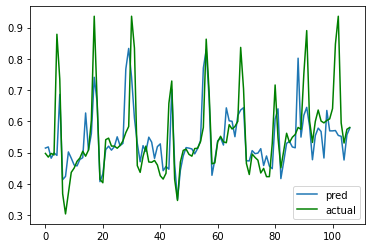

In [48]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0,107,1),Y_pred, label="pred")
plt.plot(np.arange(0,107,1),Y_test,c="g",label="actual")
plt.legend()
plt.show()


In [52]:
baseline = X_train.sensor_1_lag1
MAE = mean_absolute_error(Y_test,baseline)
print(MAE)

0.10616565420560747


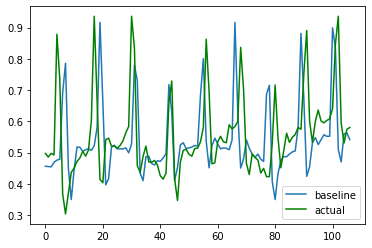

In [54]:
plt.plot(np.arange(0,107,1),baseline,label="baseline")
plt.plot(np.arange(0,107,1),Y_test,c="g",label="actual")
plt.legend()
plt.show()